In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import white wine
wine_white = pd.DataFrame(pd.read_csv("winequality-white.csv", sep = ';')) 
wine_white.insert(0, 'type', 1)
wine_white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#import red wine
wine_red = pd.DataFrame(pd.read_csv("winequality-red.csv", sep = ';'))
wine_red.insert(0, 'type', 0)
wine_red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#combine both datasets into one
wine = pd.concat([wine_white, wine_red], axis = 0)
wine = wine.reset_index(drop=True)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Split data set between parameters and output
X = wine.iloc[:, range(1, 13)]
Y = wine.iloc[:, 0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [6]:
#split data set into X and Y training and testing sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
#splitting 70% data for training, 30% data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

#Standardizing the parameters so they are all equally weighted during training
scalerStand = StandardScaler()
X_train = scalerStand.fit_transform(X_train)
X_test = scalerStand.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

#preforming logistic regression on the training set
np.random.seed(0)
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [9]:
#using the Logistic regression model to predict the output of testing set
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [10]:
#Creating a confusion matrix that compares predicted values to actual values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [29]:
#Printing the accuracy, precision, and recall
from sklearn import metrics 
normalLR_acc = metrics.accuracy_score(Y_test, Y_pred)
normalLR_prec = metrics.precision_score(Y_test, Y_pred)
normalLR_rec = metrics.recall_score(Y_test, Y_pred)

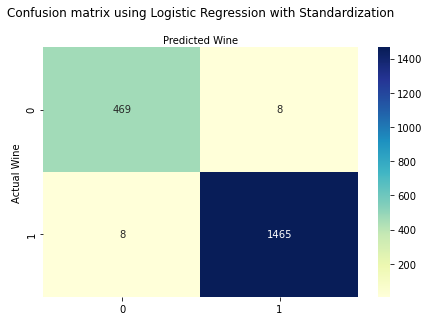

In [12]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix using Logistic Regression with Standardization', y=1.1) 
plt.ylabel('Actual Wine') 
plt.xlabel('Predicted Wine');

In [13]:
X = scalerStand.fit_transform(X)

In [14]:
#creating matrices for accuracy, precision, and recall
acc_score = []
precision_score = []
recall_score = []

In [15]:
from sklearn.decomposition import PCA
N = 12 #components
#for loop to iterate through pca with n components
for x in range(N):
    if x <= 1: #PCA does not work when N <= 1
        acc_score.append(0)
        precision_score.append(0)
        recall_score.append(0)
    else:
        #Performing PCA on dataset inputs
        pca = PCA(n_components=x) 
        principalComponents = pca.fit_transform(X) 
        wine_pca = pd.DataFrame(data = principalComponents) 
        final_wine_pca = pd.concat([wine_pca, wine[['type']]], axis = 1)
        
        X2 = final_wine_pca.iloc[:, range(x)]
        Y2 = final_wine_pca.iloc[:, x]
    
        np.random.seed(0)
        #70% data for training, 30% data for testing
        X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.30, random_state = 42)
    
        #performing logistic regression on the dataset PCA
        classifier.fit(X2_train, Y2_train)
        Y2_pred = classifier.predict(X2_test)
        
        #Creating a confusion matrix that compares predicted values to actual values
        from sklearn.metrics import confusion_matrix
        cm_pca = confusion_matrix(Y2_test, Y2_pred)
    
        acc = metrics.accuracy_score(Y2_pred, Y2_test)
        acc_score.append(acc)
        
        pres = metrics.precision_score(Y2_pred, Y2_test)
        precision_score.append(pres)
    
        recall = metrics.recall_score(Y2_pred, Y2_test)
        recall_score.append(recall)

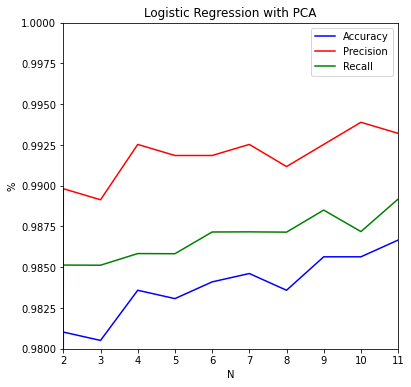

In [16]:
#plot PCA: N vs Accuracy, precision, and recall
n = np.array( range(N))
fig, ax = plt.subplots(figsize =(6, 6))
plt.title("Logistic Regression with PCA")
plt.xticks(range(N))
plt.plot(n, acc_score, color = 'blue', label = 'Accuracy')
plt.plot(n, precision_score, color = 'red', label = 'Precision')
plt.plot(n, recall_score, color = 'green', label = 'Recall')
plt.legend()
plt.ylim([0.98, 1])
plt.xlim([2, 11])
plt.xlabel('N')
plt.ylabel('%')
plt.show()

In [17]:
#Printing the accuracy, precision, and recall
from sklearn import metrics 
print("Accuracy:",acc_score[11]) 
print("Precision:",precision_score[11]) 
print("Recall:",recall_score[11])

Accuracy: 0.9866666666666667
Precision: 0.9932111337406653
Recall: 0.9891818796484111


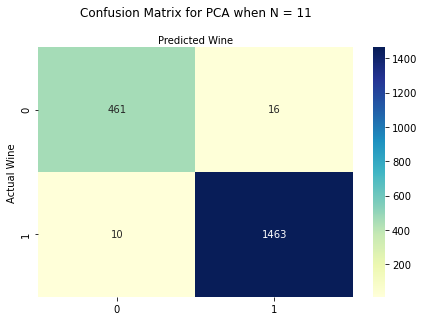

In [18]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm_pca), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix for PCA when N = 11', y=1.1) 
plt.ylabel('Actual Wine') 
plt.xlabel('Predicted Wine');

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#performing LDA on the dataset
lda = LinearDiscriminantAnalysis(n_components=1) 
principalComponents1 = lda.fit_transform(X, Y) 
wine_lda = pd.DataFrame(data = principalComponents1) 
final_wine_lda = pd.concat([wine_lda, wine[['type']]], axis = 1)

np.random.seed(0)
#70% data for training, 30% data for testing
lda_train, lda_test = train_test_split(final_wine_lda, test_size = 0.30, random_state = 0)


#splitting inputs and output
X_trainlda = lda_train.loc[:, 0].values
Y_trainlda = lda_train.loc[:, ['type']].values

X_testlda = lda_test.loc[:, 0].values
Y_testlda = lda_test.loc[:, ['type']].values

In [30]:
from sklearn.naive_bayes import GaussianNB

#performing gaussian naive bayes on the dataset after LDA
classifierG = GaussianNB()
classifierG.fit(X_trainlda.reshape(-1, 1), Y_trainlda.ravel())
Y_predlda = classifierG.predict(X_testlda.reshape(-1,1))

cm_lda_g = confusion_matrix(Y_testlda, Y_predlda)

#printing the accuracy, regression, and recall
LDA_g_acc = metrics.accuracy_score(Y_testlda, Y_predlda) 
LDA_g_prec = metrics.precision_score(Y_testlda, Y_predlda) 
LDA_g_rec = metrics.recall_score(Y_testlda, Y_predlda)

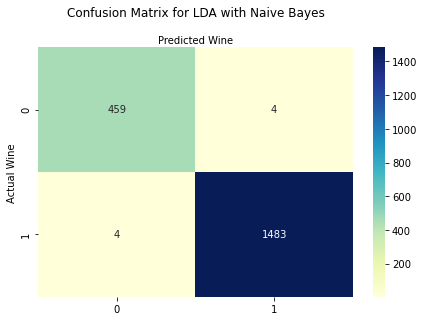

In [31]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm_lda_g), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix for LDA with Naive Bayes', y=1.1) 
plt.ylabel('Actual Wine') 
plt.xlabel('Predicted Wine');

In [36]:
np.random.seed(0)
#70% data for training, 30% data for testing
lda2_train, lda2_test = train_test_split(final_wine_lda, test_size = 0.30, random_state = 42)

#splitting inputs and outputs
X2_trainlda = lda2_train.loc[:, 0].values
Y2_trainlda = lda2_train.loc[:, ['type']].values

X2_testlda = lda2_test.loc[:, 0].values
Y2_testlda = lda2_test.loc[:, ['type']].values

#performing logistic regression on the dataset after lda
classifier.fit(X2_trainlda.reshape(-1, 1), Y2_trainlda.ravel())
Y_predlda2 = classifier.predict(X2_testlda.reshape(-1,1))

cm_lda = confusion_matrix(Y2_testlda, Y_predlda2)
#printing the accuracy, regression, and recall
LDA_lr_acc = metrics.accuracy_score(Y2_testlda, Y_predlda2) 
LDA_lr_prec = metrics.precision_score(Y2_testlda, Y_predlda2) 
LDA_lr_rec = metrics.recall_score(Y2_testlda, Y_predlda2)

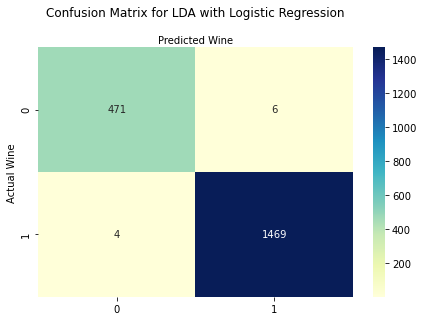

In [23]:
#Plotting Confusion Matrix of predicted vs actual values
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm_lda), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix for LDA with Logistic Regression', y=1.1) 
plt.ylabel('Actual Wine') 
plt.xlabel('Predicted Wine');

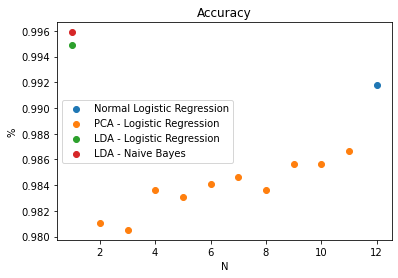

In [41]:
labels = ['Normal Logistic Regression', 'PCA - Logistic Regression', 'LDA - Logistic Regression', 'LDA - Naive Bayes']
x = np.array(range(2,12));
plt.scatter(12, normalLR_acc)
plt.scatter(x, acc_score[2:12])
plt.scatter(1, LDA_lr_acc)
plt.scatter(1, LDA_g_acc)
plt.ylabel('%');
plt.xlabel('N');
plt.title('Accuracy');
plt.legend(labels);

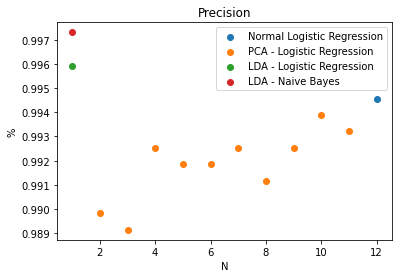

In [42]:
x = np.array(range(2,12));
plt.scatter(12, normalLR_prec)
plt.scatter(x, precision_score[2:12])
plt.scatter(1, LDA_lr_prec)
plt.scatter(1, LDA_g_prec)
plt.ylabel('%');
plt.xlabel('N');
plt.title('Precision');
plt.legend(labels);

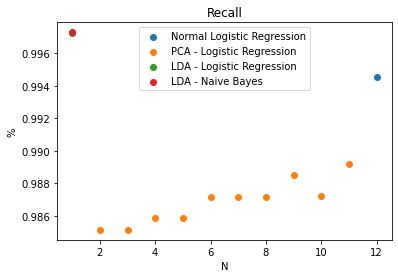

In [43]:
x = np.array(range(2,12));
plt.scatter(12, normalLR_rec)
plt.scatter(x, recall_score[2:12])
plt.scatter(1, LDA_lr_rec)
plt.scatter(1, LDA_g_rec)
plt.ylabel('%');
plt.xlabel('N');
plt.title('Recall');
plt.legend(labels, loc = 'upper center');